# FIFA WORLD CUP history: Goals, Games, and Graphs

## 2024-25 Individual Assessment

*This is the MN5813 Individual Assignment.*
- Candidate number: 2601587

[Link](https://github.com/99DJ89/MN5813--Individual--project) link for the Github (https://github.com/99DJ89/MN5813--Individual--project)

<img src="Data/adobe-express-qr-code.png" width="150" height="150">


## Project summary

In [ ]:
# Add your project summary here [app. 200-250 words]

## Generative AI


This project is done manually. However we used AI to help us genetate ideas for improving work.

For example, we also used AI to understand the following:

how to correct some errors that occurred during the way that we couldn't cope with
what relative path is in order to collaborate effectivily as a team when sharing our Jupiter Notebooks with each other
how to remove index in some outputs from the display
AI assistance was provided using:

1) Perplexity AI (Pro subscription), which uses large language models such as Sonar (Perplexity, based on Llama 3.1 70B), GPT‑5.1 (OpenAI), Claude Sonnet 4.5 (Anthropic), and Gemini 3 Pro (Google DeepMind) via Perplexity’s model selector. Provider - Perplexity AI, Inc.

2) ClaudeAI, Version: Claude Sonnet 3.5, an AI language model developed by Anthropic.

## Introduction


Football is more than a sport; it is an obsession and a universal language that brings together over 3.5 billion fans across the globe. While mega-sport events involve massive financial outlays, their true power lies in the emotional connections and cultural bridges they build between different civilizations. For a host nation like Qatar, the 2022 World Cup represented a historic milestone and an opportunity to move beyond its reputation as a resource-rich state to introduce the world to its living heritage and traditional hospitality.

The profound reality of these events is often found in the personal stories that take place away from the scoreboard. For example, a couple from Brazil named Pedro and Ana initially hesitated to travel to the Middle East due to anxieties fueled by negative media portrayals. However, their experience was transformed not by the architecture, but by genuine human interactions, such as a local resident returning a lost wallet or an invitation to a traditional family dinner. These moments prove that a destination’s image is most effectively reshaped through direct engagement and the breaking of long-held stereotypes.

The event's "heart and soul" were the 20,000 volunteers who originated from 150 different countries to facilitate the tournament. For volunteers like Tariro and Tafara, a mother and son from Zimbabwe, the experience was a journey of personal growth that allowed them to step beyond their comfort zones and find unity in a diverse global community. This "soft power" of human connection helps decrease international misunderstandings and replaces "otherness" with mutual respect.

Ultimately, the legacy of a mega-event is not just the $220 billion in infrastructure, but the collective pride and joy shared by the community. By satisfying the human need for safety, belonging, and shared celebration, a country can redefine its global identity and leave a lasting, positive impression on the world.

Data source for our project is a dataset on Kaggle ="https://www.kaggle.com/datasets/abecklas/fifa-world-cup".
# Aim:
The aim of this project is to explore a historical dataset on the FIFA WorldCup, extract insights and assess trends around the FIFA WorldCup from 1930 to 2014.
# Objectives:
1. **Objective:** Understand the data To get a clear picture of the tournament's history, I will:

 - Identify the top 5 most successful World Cup nations. 
 - Calculate the total goals scored by each country.
 - Find the stadium that has hosted the largest crowds.

2. **Objective:** Visually explore the data set I want to bring the numbers to life by creating two clear visualizations:
 - A chart showing how many goals were scored in each tournament year.
 - A graph showing how stadium attendance has changed over time.

3. **Objective:** Make recommendations for future work To take this project further, I could:
 - Study individual player stats, like top scorers.
 - Look into whether being the home team actually helps a country win.
 - Try to predict future match results using the historical data I've analyzed.

## Setup

### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set display options for better output
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", None)


### Load data

In [2]:
#data_source = "https://docs.google.com/spreadsheets/d/1Pg9ScLoN1USl0T036H0rqCYYOHJwusMVD-_q1ciiAeY/edit?usp=sharing"  # Add URL to raw data here
def load_WorldCup_data(url=None, dataset_type='WorldCupMatches'):
    """
    Downloads the dataset for Individual project
    and saves it locally (requires Internet connection!).
    
    Source: https://github.com/99DJ89/MN5813--Individual--project
       
    Parameters:
        url: [optional] url of the data file.
             If none specified, uses default based on dataset_type.
        dataset_type: [optional] 'WorldCupMatches' or 'WorldCupPlayers' or 'WorldCups'
             Determines which default dataset to download.
             
    Returns:
        str: Path to the downloaded CSV file
    """
    import urllib.request
    from pathlib import Path
    
    # Define default URLs for both datasets
    default_urls = {
        'WorldCupMatches': "https://raw.githubusercontent.com/99DJ89/MN5813--Individual--project/refs/heads/main/Data/WorldCupMatches.csv",
        'WorldCupPlayers': "https://raw.githubusercontent.com/99DJ89/MN5813--Individual--project/refs/heads/main/Data/WorldCupPlayers.csv",
        'WorldCups': "https://raw.githubusercontent.com/99DJ89/MN5813--Individual--project/refs/heads/main/Data/WorldCups.csv"
    }
    
    # Use provided URL or default based on dataset_type
    if not url:
        url = default_urls.get(dataset_type, default_urls['WorldCupMatches'])
            
    # Define default output path
    output_dir = Path("assets/data")
    output_name = url.split('/')[-1]
    output_path = output_dir / output_name
    
    # Skip download if file already exists
    if output_path.exists():
        print(f"File already exists: {output_path}")
        print("Will not proceed with downloading!")
        return str(output_path)
    
    # Create directory structure
    print(f"Creating directory: {output_dir}")
    output_dir.mkdir(parents=True, exist_ok=True)
    
    print(f"Downloading dataset ...\n{output_path}")
    req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    
    with urllib.request.urlopen(req, timeout=60) as response:
        data = response.read()
        with open(output_path, 'wb') as f:
            f.write(data)
        print(f"Dataset saved as: {output_path}")
    
    return str(output_path)

In [3]:
# Download WorldCupMatches.csv
Matches_data_path = load_WorldCup_data(dataset_type='WorldCupMatches')

# Download WorldCupPlayers.csv
Players_data_path = load_WorldCup_data(dataset_type='WorldCupPlayers')

# Download WorldCups.csv
WorldCup_data_path = load_WorldCup_data(dataset_type='WorldCups')

File already exists: assets\data\WorldCupMatches.csv
Will not proceed with downloading!
File already exists: assets\data\WorldCupPlayers.csv
Will not proceed with downloading!
File already exists: assets\data\WorldCups.csv
Will not proceed with downloading!


When we started working on the project we downloaded Zip file from Kaggle to our laptops and created relative path.

We extracted zip and found two csv files in the folder:

 - WorldCupMatches
 - WorldCupPlayers
 - WorldCups

### Convert into DataFrame

- I use `pd.read_csv()` to convert data from both files found in MN583 Group2 folder into Pandas DataFrames, And we use relative paths to the data for consistency.
- First I want to know how many rows and columns in our both data sets and names of the columns.
- I use `len(data_frame)` to find how many rows in our data sets; `len(data_frame.columns)` to find the number of columns and `list(data_frame.columns)` to list names of all the columns in our data sets.

In [4]:
# Your code here
WorldCupMatches = df = pd.read_csv("Data/WorldCupMatches.csv")
WorldCupPlayers = schema_df = pd.read_csv("Data/WorldCupPlayers.csv")
WorldCups = schema_df = pd.read_csv("Data/WorldCups.csv")

print(f"Dataset'WorldCupMatches' loaded: {len(WorldCupMatches)} rows, {len(WorldCupMatches.columns)} columns")
print(f"\nColumn names:\n{list(WorldCupMatches.columns)}")

print(f"Dataset'WorldCupPlayers' loaded: {len(WorldCupPlayers)} rows, {len(WorldCupPlayers.columns)} columns")
print(f"\nColumn names:\n{list(WorldCupPlayers.columns)}")

print(f"Dataset'WorldCups' loaded: {len(WorldCups)} rows, {len(WorldCups.columns)} columns")
print(f"\nColumn names:\n{list(WorldCups.columns)}")



Dataset'WorldCupMatches' loaded: 4572 rows, 20 columns

Column names:
['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials']
Dataset'WorldCupPlayers' loaded: 37784 rows, 9 columns

Column names:
['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up', 'Shirt Number', 'Player Name', 'Position', 'Event']
Dataset'WorldCups' loaded: 20 rows, 10 columns

Column names:
['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance']


In [5]:
# SUGGESTION: Merge data from multiple files into a single DataFrame
#df = pd.merge(WorldCupMatches, WorldCupPlayers, WorldCups, on="NOC", how="left")
#df = WorldCupMatches.merge(WorldCupPlayers, on="NOC", how="left") \
                     #.merge(WorldCups, on="NOC", how="left")
# Example: Merge based on Year
df = WorldCupMatches.merge(WorldCups, on="Year", how="left") \
                     .merge(WorldCupPlayers, on="MatchID", how="left")

# Or if the column names differ:
df = WorldCupMatches.merge(WorldCups, left_on="Year", right_on="Year", how="left")


In [6]:
print("First 10 rows:")
# df.head(10)
print(df.shape)


First 10 rows:
(4572, 29)


Display the first few rows and basic information about the DataFrame `df` you have created from `data_source`.

In [7]:
# print(df.head())
#print(df.head(10))
display (df.head(10))

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance_x,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13.0,18.0,590.549
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13.0,18.0,590.549
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13.0,18.0,590.549
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13.0,18.0,590.549
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13.0,18.0,590.549
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13.0,18.0,590.549
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13.0,18.0,590.549
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13.0,18.0,590.549
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13.0,18.0,590.549
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13.0,18.0,590.549


In [8]:
# print(df.info())
#print(df.info())
#display (df.info())
print ("Dataset Info:")
print (WorldCupMatches.info())
print ("\n" + "="*50), display ("\nDataset Description:")
print (WorldCupMatches.describe())
print ("\n" + "="*50)
print ("\nColumn Names:")
print (WorldCupMatches.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assista

'\nDataset Description:'

              Year  Home Team Goals  Away Team Goals     Attendance  \
count   852.000000       852.000000       852.000000     850.000000   
mean   1985.089202         1.811033         1.022300   45164.800000   
std      22.448825         1.610255         1.087573   23485.249247   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   30000.000000   
50%    1990.000000         2.000000         1.000000   41579.500000   
75%    2002.000000         3.000000         2.000000   61374.500000   
max    2014.000000        10.000000         7.000000  173850.000000   

       Half-time Home Goals  Half-time Away Goals       RoundID       MatchID  
count            852.000000            852.000000  8.520000e+02  8.520000e+02  
mean               0.708920              0.428404  1.066177e+07  6.134687e+07  
std                0.937414              0.691252  2.729613e+07  1.110572e+08  
min                0.000000             

Before I analyze anything, we need to understand what we're working with. This cell gives us three important views of our data:

1. **Dataset Info** - Shows us the structure: what type of data is in each column (numbers, text, dates), and if anything is missing
2. **Dataset Description** - Gives us statistics like average goals per match, highest attendance, etc.
3. **Column Names** - Lists all the categories of information we have

This is like opening a new toolbox and checking what tools you have before starting a project. It helps us spot any problems early and plan our analy0sis.

## Data management

### Data cleaning

#### Data cleaning is essential before analysis. We'll identify and handle:
- Missing values
- Data type issues
- Duplicates
- Outliers (if needed)

In [9]:
# TODO: Handle missing values
missing = WorldCupMatches.isnull().sum()
missing_pct = (WorldCupMatches.isnull().sum() / len(WorldCupMatches) * 100).round(1)

missing_summary = pd.DataFrame({
    "Missing_Count": missing,
    "Missing_Percent": missing_pct
})

display ("Missing values summary:")
display (missing_summary[missing_summary['Missing_Count'] > 0].sort_values("Missing_Count", ascending=False))

'Missing values summary:'

,Missing_Count,Missing_Percent
Attendance,3722,81.4
Datetime,3720,81.4
Home Team Initials,3720,81.4
MatchID,3720,81.4
RoundID,3720,81.4
Assistant 2,3720,81.4
Assistant 1,3720,81.4
Referee,3720,81.4
Half-time Away Goals,3720,81.4
Half-time Home Goals,3720,81.4


## Analysis of missing values
In every category expect Attendence the missing values are:
- Missing count is 3720 
- Missing percent is 81.4%

Only in Attendece the missing count is higher by only 2 number than others.

Here we're checking for "holes" in our data - missing information. Imagine you have a form where some people didn't fill in all the fields.

The `.isnull().sum()` function counts how many missing values each column has. We only display columns that actually have missing data (where the count is greater than 0). This is important because missing data can affect our analysis. 

For example, if attendance numbers are missing for some matches, our average attendance calculation might be wrong. Knowing what's missing helps us decide how to handle it - should we fill it in with estimates, remove those rows, or leave it as is?




In [10]:
# TODO: Convert data types where necessary
display ("Current data types:")
display (df.dtypes)

'Current data types:'

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance_x            float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
Country                  object
Winner                   object
Runners-Up               object
Third                    object
Fourth                   object
GoalsScored             float64
QualifiedTeams          float64
MatchesPlayed           float64
Attendance_y             object
dtype: object

In [11]:
# Convert year to datetime for time-based analysis
# Note: We only have the year, not a full date
df['Year_dt'] = pd.to_datetime(df['Year'], format="%Y")

display ("Added Year_dt column:")
display(df[["Year", "Year_dt"]].head())
display (f"\nData type of year_dt: {df['Year_dt'].dtype}")

'Added Year_dt column:'

,Year,Year_dt
0,1930.0,1930-01-01
1,1930.0,1930-01-01
2,1930.0,1930-01-01
3,1930.0,1930-01-01
4,1930.0,1930-01-01


'\nData type of year_dt: datetime64[ns]'

### Converting data type to datetime enables:

- Time series analysis
- Extraction of decade, century
- Chronological sorting and grouping
- Date-based filtering

In [12]:
# TODO: Remove any duplicate entries
WorldCupMatches = WorldCupMatches.drop_duplicates()
print(f"After removing duplicates: {len(WorldCupMatches)} rows")

After removing duplicates: 837 rows


In [13]:
# TODO: Anything else?
df_clean = df.drop_duplicates()
print(f"Original rows: {len(df)}")
print(f"After removing duplicates: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

# Use the cleaned dataset going forward
df = df_clean

Original rows: 4572
After removing duplicates: 837
Rows removed: 3735


In [14]:
# Convert data types
WorldCupMatches['Year'] = pd.to_numeric(WorldCupMatches['Year'], errors='coerce')
WorldCupMatches['Attendance'] = pd.to_numeric(WorldCupMatches['Attendance'], errors='coerce')
WorldCupMatches['Home Team Goals'] = pd.to_numeric(WorldCupMatches['Home Team Goals'], errors='coerce')
WorldCupMatches['Away Team Goals'] = pd.to_numeric(WorldCupMatches['Away Team Goals'], errors='coerce')
WorldCupMatches['Half-time Home Goals'] = pd.to_numeric(WorldCupMatches['Half-time Home Goals'], errors='coerce')
WorldCupMatches['Half-time Away Goals'] = pd.to_numeric(WorldCupMatches['Half-time Away Goals'], errors='coerce')

In [15]:
# Fill NaN values with 0 for goals and attendance
WorldCupMatches.fillna({
    'Home Team Goals': 0, 
    'Away Team Goals': 0, 
    'Attendance': 0,
    'Half-time Home Goals': 0,
    'Half-time Away Goals': 0
}, inplace=True)

In [16]:
# Create a total goals column
WorldCupMatches['Total Goals'] = WorldCupMatches['Home Team Goals'] + WorldCupMatches['Away Team Goals']

print("\nData cleaning completed!")
print("\nCleaned data sample:")
WorldCupMatches.head()


Data cleaning completed!

Cleaned data sample:


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,4.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1.0


### This is our data cleaning phase - like washing vegetables before cooking! We're doing several important things:

1. **Removing duplicates:** If the same match appears twice in our data, we keep only one copy. This prevents counting the same match multiple times.

2. **Converting data types:** We're making sure numbers are actually stored as numbers, not text. The `pd.to_numeric()` function converts columns to numeric format. The `errors='coerce'` means if something can't be converted to a number, it becomes NaN (Not a Number) instead of causing an error.

3. **Filling missing values:** We replace any NaN values with 0 for goals and attendance. This makes sense because if data is missing, we assume no goals or no recorded attendance rather than leaving it blank.

4. **Creating new columns:** We add a 'Total Goals' column by adding home and away goals together. This makes it easier to analyze total scoring in matches.

Clean data = reliable analysis!


## Objective 1: Understand the Data
### 1.1 Top 5 Most Successful Nations

TOP 5 MOST SUCCESSFUL NATIONS (By Number of Wins)
1. Brazil               -  70 wins
2. Italy                -  45 wins
3. Argentina            -  42 wins
4. Germany FR           -  36 wins
5. Germany              -  30 wins


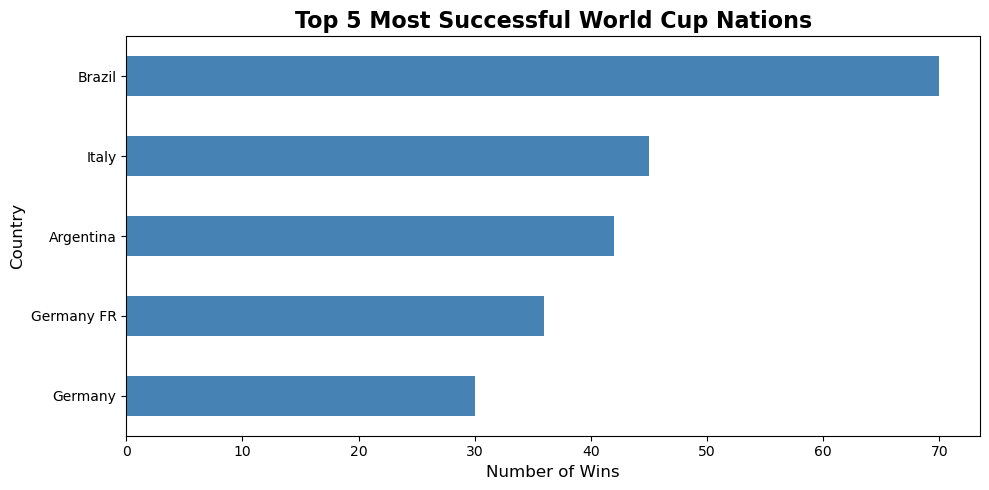

<Figure size 640x480 with 0 Axes>

In [29]:
# Top 5 Most Successful Nations
# Determine the winner of each match
def determine_winner(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return row['Home Team Name']
    elif row['Away Team Goals'] > row['Home Team Goals']:
        return row['Away Team Name']
    else:
        return 'Draw'

WorldCupMatches['Winner'] = WorldCupMatches.apply(determine_winner, axis=1)

# Count wins (excluding draws)
wins = WorldCupMatches[WorldCupMatches['Winner'] != 'Draw']['Winner'].value_counts()
top_5_nations = wins.head(5)

print("=" * 60)
print("TOP 5 MOST SUCCESSFUL NATIONS (By Number of Wins)")
print("=" * 60)
for i, (nation, wins_count) in enumerate(top_5_nations.items(), 1):
    print(f"{i}. {nation:20s} - {wins_count:3d} wins")
print("=" * 60)

# Visualize
plt.figure(figsize=(10, 5))
top_5_nations.plot(kind='barh', color='steelblue')
plt.title('Top 5 Most Successful World Cup Nations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Save the chart as PNG file
plt.savefig("Top 5 Most Successful World Cup Nations.png", dpi=300, bbox_inches="tight")
plt.show()


### What this section does:
Here we're finding the champions! We created a function called `determine_winner()` that looks at each match and decides who won by comparing goals. It's like a referee making the final call:

- If home team scored more → home team wins
- If away team scored more → away team wins
- If equal → it's a draw

We apply this function to every row in our dataset using `.apply()`, creating a new 'Winner' column. Then we count how many times each country appears as a winner using `.value_counts()` - it's like tallying votes.

The `.head(5)` gives us the top 5 countries with the most wins. We print this in a nice formatted table and then create a horizontal bar chart to visualize it. The chart makes it easy to see at a glance which nations dominate World Cup history. The `invert_yaxis()` puts the #1 team at the top of the chart, which feels more natural.

In the category of country **Germany FR** means **Federal Republic of Germany** and It was the official name for West Germany from 1949 to 1990.

### 1.2 Total Goals Scored by Each Country

TOTAL GOALS SCORED BY EACH COUNTRY

Top 10 Goal-Scoring Nations:
 1. Brazil               -  221 goals
 2. Argentina            -  131 goals
 3. Germany FR           -  131 goals
 4. Italy                -  128 goals
 5. France               -  106 goals
 6. Germany              -   93 goals
 7. Spain                -   92 goals
 8. Hungary              -   87 goals
 9. Netherlands          -   86 goals
10. Uruguay              -   80 goals


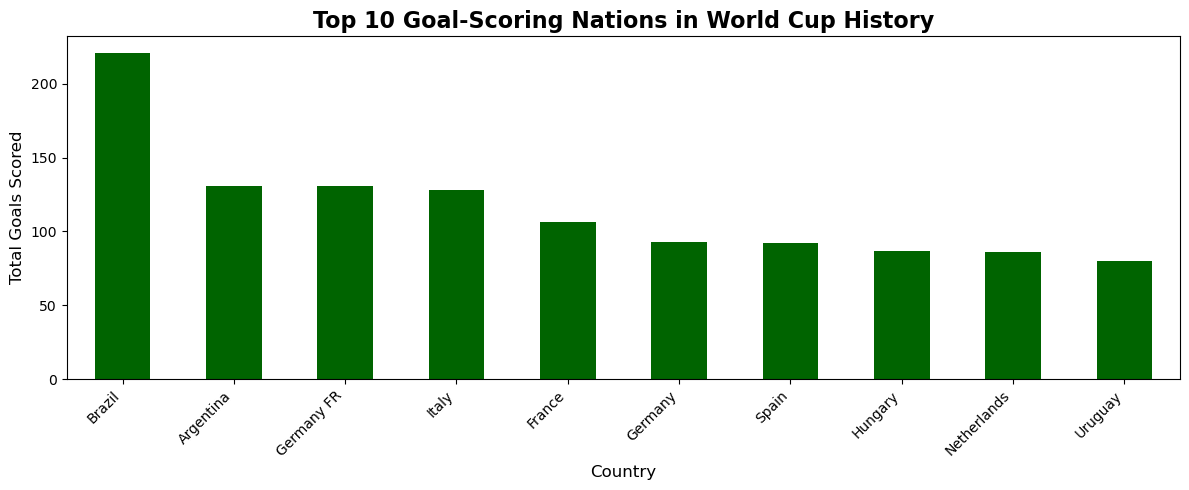

In [30]:
# Calculate total goals for home and away
home_goals = WorldCupMatches.groupby('Home Team Name')['Home Team Goals'].sum()
away_goals = WorldCupMatches.groupby('Away Team Name')['Away Team Goals'].sum()

# Combine both home and away goals
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)

print("=" * 60)
print("TOTAL GOALS SCORED BY EACH COUNTRY")
print("=" * 60)
print("\nTop 10 Goal-Scoring Nations:")
for i, (country, goals) in enumerate(total_goals.head(10).items(), 1):
    print(f"{i:2d}. {country:20s} - {int(goals):4d} goals")
print("=" * 60)

# Visualize top 10
plt.figure(figsize=(12, 5))
total_goals.head(10).plot(kind='bar', color='darkgreen')
plt.title('Top 10 Goal-Scoring Nations in World Cup History', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Goals Scored', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This is where we calculate total goals scored by each country. But there's a trick - countries play both as home teams and away teams, so we need to count goals from both situations!

Here's what we do:

1. **Group by home team:** We group all matches by 'Home Team Name' and sum up their 'Home Team Goals'. This gives us all goals scored when playing at home.
   
2. **Group by away team:** Same thing but for away matches.

3. **Combine them:** We use `.add()` with `fill_value=0` to add both together. The `fill_value=0` handles cases where a team only played home or only away (though rare).

4. **Sort:** We sort from highest to lowest using sort_values(ascending=False).

The result shows us the most prolific goal-scorers in World Cup history. We display the top 10 in both a table and a bar chart. The bar chart uses green color (fitting for a football field) and rotates the country names at 45 degrees so they don't overlap.

### 1.3 Stadium with Largest Crowds

STADIUM WITH LARGEST CROWD

Stadium: Maracan� - Est�dio Jornalista M�rio Filho
City: Rio De Janeiro 
Attendance: 173,850 spectators
Match: Uruguay vs Brazil
Score: 2 - 1
Year: 1950
Stage: Group 6

TOP 10 STADIUMS BY TOTAL ATTENDANCE (All Matches Combined)
 1. Estadio Azteca                      - 1,917,550 total spectators
 2. Olympiastadion                      - 815,300 total spectators
 3. Maracan� - Est�dio Jornalista M�rio Filho - 813,541 total spectators
 4. Wembley Stadium                     - 778,034 total spectators
 5. Rose Bowl                           - 740,807 total spectators
 6. Jalisco                             - 722,456 total spectators
 7. Stade de France                     - 704,000 total spectators
 8. Soccer City Stadium                 - 670,859 total spectators
 9. Nacional                            - 663,771 total spectators
10. El Monumental - Estadio Monumental Antonio Vespuci - 625,389 total spectators


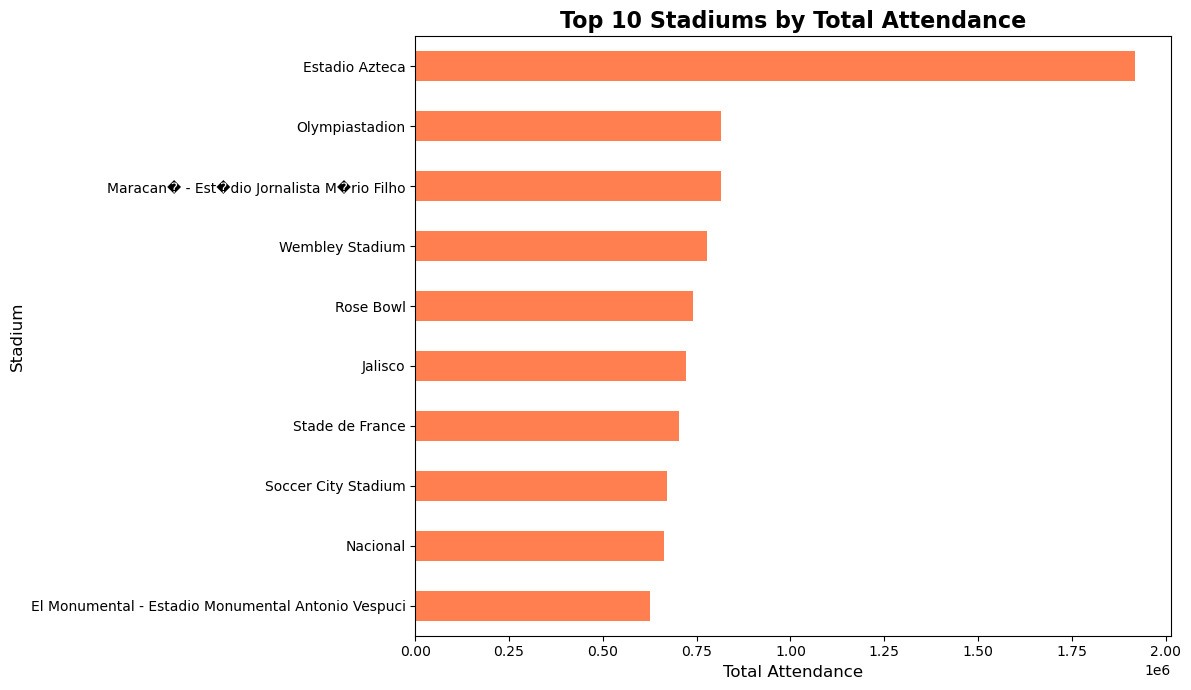

In [31]:
# Stadium with Largest Crowds
# Find the match with maximum attendance
max_attendance_idx = WorldCupMatches['Attendance'].idxmax()
max_attendance_match = WorldCupMatches.loc[max_attendance_idx]

print("=" * 70)
print("STADIUM WITH LARGEST CROWD")
print("=" * 70)
print(f"\nStadium: {max_attendance_match['Stadium']}")
print(f"City: {max_attendance_match['City']}")
print(f"Attendance: {int(max_attendance_match['Attendance']):,} spectators")
print(f"Match: {max_attendance_match['Home Team Name']} vs {max_attendance_match['Away Team Name']}")
print(f"Score: {int(max_attendance_match['Home Team Goals'])} - {int(max_attendance_match['Away Team Goals'])}")
print(f"Year: {int(max_attendance_match['Year'])}")
print(f"Stage: {max_attendance_match['Stage']}")
print("=" * 70)

# Show top 10 stadiums by total attendance
stadium_attendance = WorldCupMatches.groupby('Stadium')['Attendance'].sum().sort_values(ascending=False)

print("\n" + "=" * 70)
print("TOP 10 STADIUMS BY TOTAL ATTENDANCE (All Matches Combined)")
print("=" * 70)
for i, (stadium, total_att) in enumerate(stadium_attendance.head(10).items(), 1):
    print(f"{i:2d}. {stadium:35s} - {int(total_att):,} total spectators")
print("=" * 70)

# Visualize
plt.figure(figsize=(12, 7))
stadium_attendance.head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Stadiums by Total Attendance', fontsize=16, fontweight='bold')
plt.xlabel('Total Attendance', fontsize=12)
plt.ylabel('Stadium', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Data analysis

In [ ]:
# TODO: Conduct data analysis


## Data visualisation

In [ ]:
# TODO: Create at least two meaningful visualisations

In [ ]:
# Example visualisation (you can modify or replace this)
# plt.figure(figsize=(10, 6))
# sns.countplot(x="Medal", data=df)
# plt.title("Distribution of Medals")
# plt.show()

In [ ]:
# SUGGESTION: Use a small multiple

## Data export

In [ ]:
# TODO: Save the cleaned and wrangled DataFrame to a new CSV file

In [ ]:
# TODO: Ensure that you can successfully load the exported CSV file

In [ ]:
# TODO: Export visualizations as image files

## Conclusion

In [ ]:
# Add your conclusion here [app. 300-500 words].

## References

1. Reference 1
2. Reference 2
3. Reference 3
4. ...

*(References must be complete and contain a link to the original source; usually a DOI link.)*

## Appendices

### Appendix A

In [ ]:
# Appendix A goes here

### Appendix B

In [ ]:
# Appendix B goes here